<a href="https://colab.research.google.com/github/GrigoreGeorgeAlexandru/Colab-projects/blob/main/LAB02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip data_MNIST.zip

Archive:  data_MNIST.zip
  inflating: data/test_images.txt    
  inflating: data/test_labels.txt    
  inflating: data/train_images.txt   
  inflating: data/train_labels.txt   


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

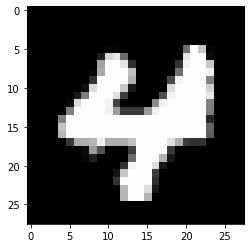

In [ ]:
train_images = np.loadtxt('data/train_images.txt')
train_labels = np.loadtxt('data/train_labels.txt').astype(np.int32)
test_images = np.loadtxt('data/test_images.txt')
test_labels = np.loadtxt('data/test_labels.txt').astype(np.int32)
image = train_images[0, :] # prima imagine
image = np.reshape(image, (28, 28))
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()

In [ ]:
def values_to_bins(train_data, test_data, bins):
    return np.digitize(train_data, bins), np.digitize(test_data, bins)

num_bins = 5
bins = np.linspace(0, 255, num_bins)
binned_train, binned_test = values_to_bins(train_images, test_images, bins)


print(train_images.min(), train_images.max())
print(test_images.min(), test_images.max())
print(binned_train.min(), binned_train.max())
print(binned_test.min(), binned_test.max())

0.0 255.0
0.0 255.0
1 5
1 5


In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

clf.fit(binned_train, train_labels)

print('accuracy =', clf.score(binned_test, test_labels))

accuracy = 0.806


In [ ]:
for num_bins in [3, 5, 7, 9, 11]:
    bins = np.linspace(0, 255, num_bins)
    binned_train, binned_test = values_to_bins(train_images, test_images, bins)

    naive_bayes_model = MultinomialNB()
    naive_bayes_model.fit(binned_train, train_labels)
    # naive_bayes_model.predict(binned_test)
    score = naive_bayes_model.score(binned_test, test_labels)
    print(num_bins, score)

3 0.802
5 0.806
7 0.81
9 0.81
11 0.814


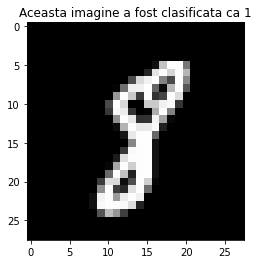

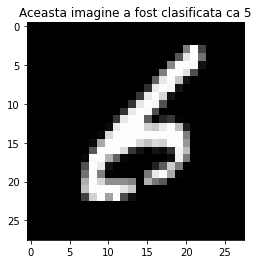

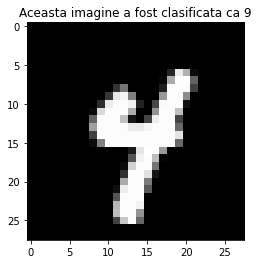

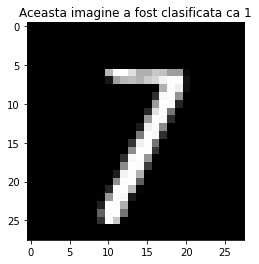

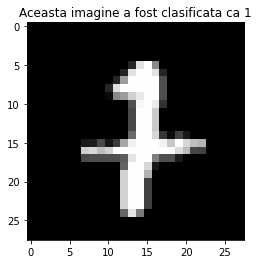

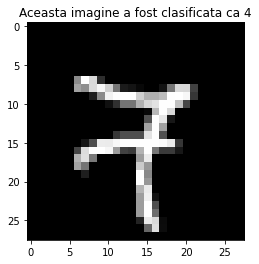

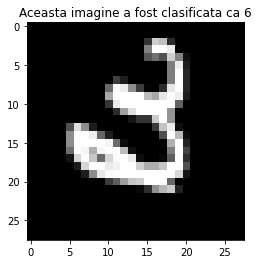

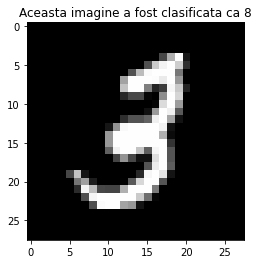

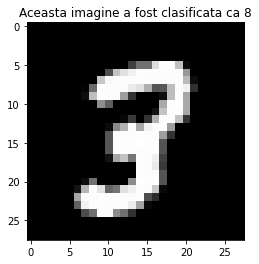

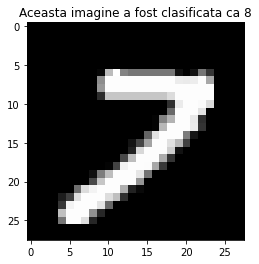

In [ ]:
bins = np.linspace(0, 255, 11)
binned_train, binned_test = values_to_bins(train_images, test_images, bins)
nbm = MultinomialNB()
nbm.fit(binned_train, train_labels)
predicted = nbm.predict(binned_train)

c = 10
for i in range(len(train_labels)):
    if train_labels[i] != predicted[i]:
        image = train_images[i, :] # prima imagine
        image = np.reshape(image, (28, 28))
        plt.title(f"Aceasta imagine a fost clasificata ca {predicted[i]}")
        plt.imshow(image.astype(np.uint8), cmap='gray')
        plt.show()
        c -= 1
    if c == 0:
        break

(500, 784)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


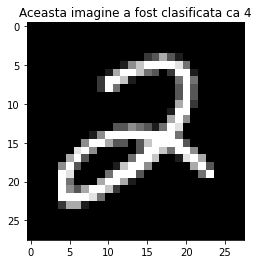

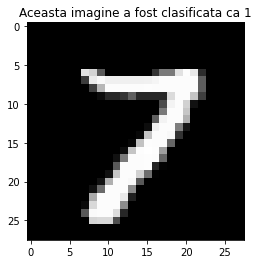

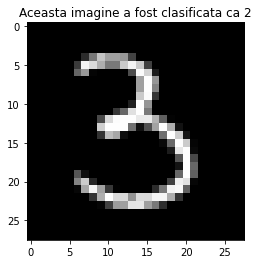

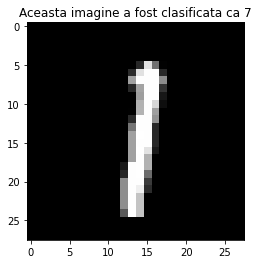

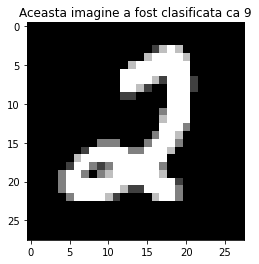

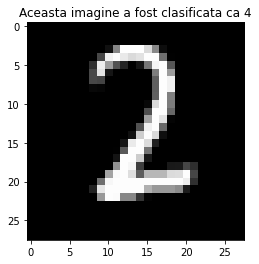

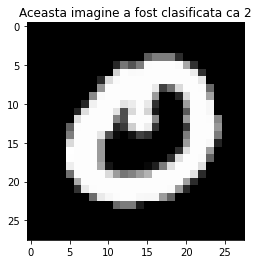

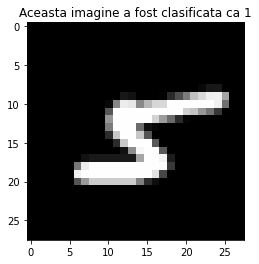

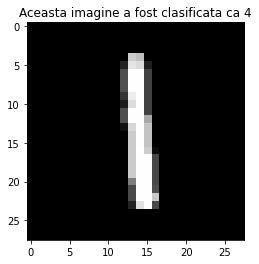

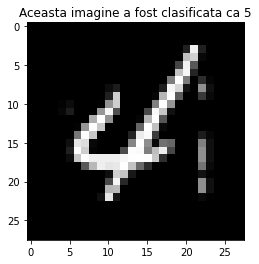

In [ ]:
bins = np.linspace(0, 255, 11)
binned_train, binned_test = values_to_bins(train_images, test_images, bins)
nbm = MultinomialNB()
nbm.fit(binned_train, train_labels)
predicted = nbm.predict(binned_train)

misclassified_images = test_images[predicted != test_labels][0]
misclassified_predictions = predicted[predicted != test_labels][0]

print(misclassified_images.shape)

for i in range(0, 10):
    plt.title(f"Aceasta imagine a fost clasificata ca {misclassified_predictions[i]}")
    plt.imshow(misclassified_images[i].reshape((28, 28)).astype(np.uint8), cmap='gray')
    plt.show()

In [ ]:
c = np.zeros((10, 10))

# for i in range(len(predicted)):
#     c[test_labels[i], predicted[i]] += 1

for y_true, y_pred in zip(test_labels, predicted):
    c[y_true, y_pred] += 1

print(c)

[[49.  0.  0.  0.  0.  0.  3.  0.  1.  0.]
 [ 0. 49.  0.  0.  0.  0.  0.  0.  3.  0.]
 [ 2.  4. 43.  2.  2.  0.  3.  1.  1.  0.]
 [ 0.  0.  1. 49.  0.  1.  0.  0.  0.  2.]
 [ 0.  0.  0.  0. 36.  0.  0.  0.  1.  9.]
 [ 1.  1.  2.  9.  0. 32.  0.  0.  5.  2.]
 [ 2.  3.  0.  0.  1.  0. 41.  0.  1.  0.]
 [ 1.  2.  0.  0.  1.  0.  0. 41.  0.  5.]
 [ 0.  1.  2.  4.  0.  2.  1.  1. 34.  1.]
 [ 0.  0.  0.  1.  7.  0.  0.  0.  1. 33.]]


In [ ]:
def values_to_bins(train_data, test_data, bins):
    train_binned = np.digitize(train_data, bins)
    test_binned = np.digitize(test_data, bins)
    return train_binned, test_binned

bins = np.linspace(start=0, stop=255, num=5)
print(bins)
train_binned, test_binned = values_to_bins(train_images, test_images, bins)

[  0.    63.75 127.5  191.25 255.  ]


In [ ]:
print(train_binned.min(), train_binned.max())

1 5


In [ ]:
naive_bayes_model = MultinomialNB()

naive_bayes_model.fit(train_binned, train_labels)
# naive_bayes_model.predict(test_binned)
print(naive_bayes_model.score(test_binned, test_labels))

0.806


In [ ]:
for num_bins in [3, 5, 7, 9, 11]:
    bins = np.linspace(start=0, stop=255, num=num_bins)
    train_binned, test_binned = values_to_bins(train_images, test_images, bins)
    nbModel = MultinomialNB()
    nbModel.fit(train_binned, train_labels)
    print(num_bins, nbModel.score(test_binned, test_labels))

3 0.802
5 0.806
7 0.81
9 0.81
11 0.814


In [ ]:
bins = np.linspace(start=0, stop=255, num=11)
train_binned, test_binned = values_to_bins(train_images, test_images, bins)
nbModel = MultinomialNB()
nbModel.fit(train_binned, train_labels)
print(num_bins, nbModel.score(test_binned, test_labels))

11 0.814


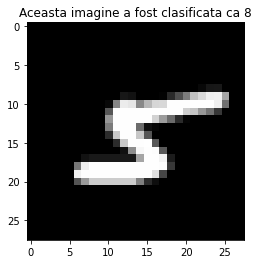

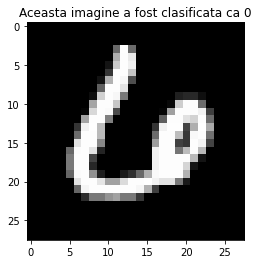

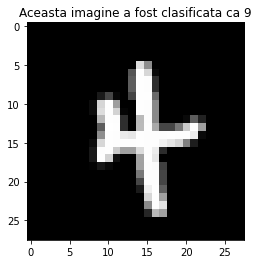

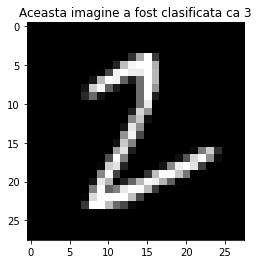

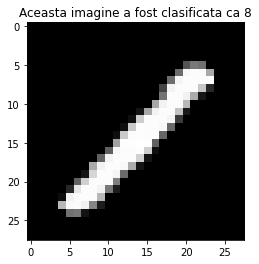

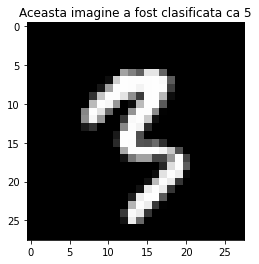

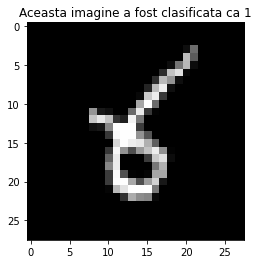

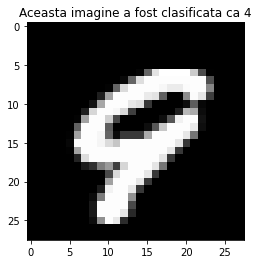

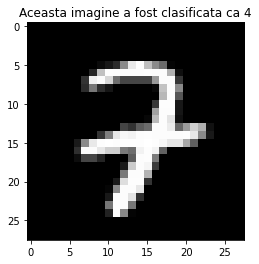

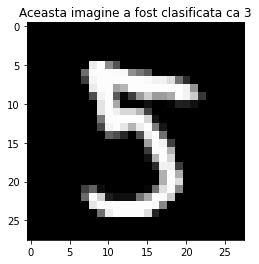

In [ ]:
predicted = nbModel.predict(test_binned)
misclassified_images = test_images[predicted != test_labels]
misclassified_labels = predicted[predicted != test_labels]

for i in range(10):
    plt.imshow(misclassified_images[i].reshape(28, 28).astype(np.uint8), cmap='gray')
    plt.title(f'Aceasta imagine a fost clasificata ca {misclassified_labels[i]}')
    plt.show()

In [ ]:
c = np.zeros((10, 10))
for y_true, y_pred in zip(test_labels, predicted):
    c[y_true, y_pred] += 1

print(c)

[[49.  0.  0.  0.  0.  0.  3.  0.  1.  0.]
 [ 0. 49.  0.  0.  0.  0.  0.  0.  3.  0.]
 [ 2.  4. 43.  2.  2.  0.  3.  1.  1.  0.]
 [ 0.  0.  1. 49.  0.  1.  0.  0.  0.  2.]
 [ 0.  0.  0.  0. 36.  0.  0.  0.  1.  9.]
 [ 1.  1.  2.  9.  0. 32.  0.  0.  5.  2.]
 [ 2.  3.  0.  0.  1.  0. 41.  0.  1.  0.]
 [ 1.  2.  0.  0.  1.  0.  0. 41.  0.  5.]
 [ 0.  1.  2.  4.  0.  2.  1.  1. 34.  1.]
 [ 0.  0.  0.  1.  7.  0.  0.  0.  1. 33.]]
